In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [2]:
images = '../input/h-and-m-personalized-fashion-recommendations/images'
train = '../input/h-and-m-personalized-fashion-recommendations/transactions_train.csv'
articles = '../input/h-and-m-personalized-fashion-recommendations/articles.csv'
customers = '../input/h-and-m-personalized-fashion-recommendations/customers.csv'
transactions = '../input/h-and-m-personalized-fashion-recommendations/transactions_train.csv'

# **Article**

In [3]:
df_articles = pd.read_csv(articles)
df_articles.head()

,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,...,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
0,108775015,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,9,Black,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
1,108775044,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,10,White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
2,108775051,108775,Strap top (1),253,Vest top,Garment Upper body,1010017,Stripe,11,Off White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
3,110065001,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,9,Black,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."
4,110065002,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,10,White,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."


In [4]:
df_articles.columns

Index(['article_id', 'product_code', 'prod_name', 'product_type_no',
       'product_type_name', 'product_group_name', 'graphical_appearance_no',
       'graphical_appearance_name', 'colour_group_code', 'colour_group_name',
       'perceived_colour_value_id', 'perceived_colour_value_name',
       'perceived_colour_master_id', 'perceived_colour_master_name',
       'department_no', 'department_name', 'index_code', 'index_name',
       'index_group_no', 'index_group_name', 'section_no', 'section_name',
       'garment_group_no', 'garment_group_name', 'detail_desc'],
      dtype='object')

<AxesSubplot:title={'center':'Top10'}, xlabel='prod_name'>

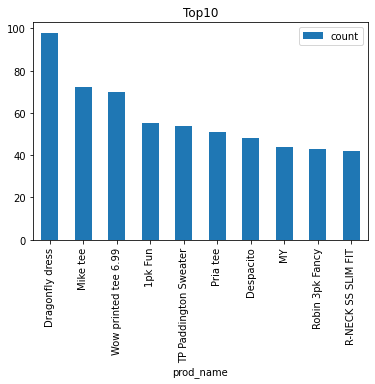

In [5]:
# Top 10 : prod_name, product_type_name

def top_10(df:pd.DataFrame, column:str):
    result = df['article_id'].groupby(df[column]).count().reset_index(name='count').sort_values(['count'], ascending = False).head(10)
    bar_chart = result.plot.bar(x=column, y='count', rot=90)
    plt.title("Top10")
    return bar_chart

top_10(df_articles, 'prod_name')

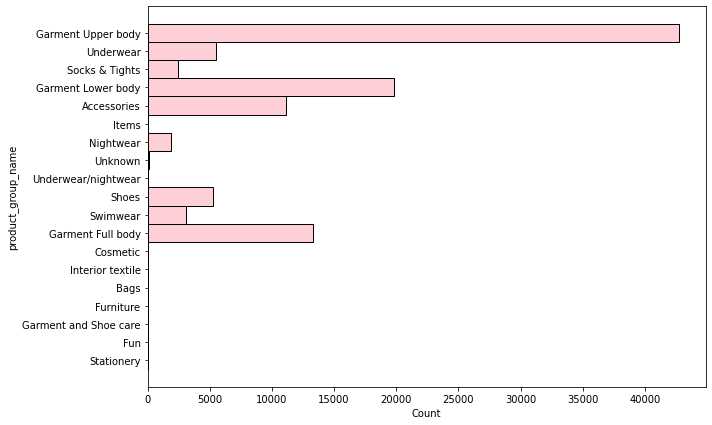

In [6]:
# Bar chart : product_group_name
# descending order - 해결 못함

def histplot(df:pd.DataFrame, column:str):
    f, ax = plt.subplots(figsize = (10,7))
    sns.histplot(data = df,
                y = column,
                color = 'pink')

histplot(df_articles, 'product_group_name')

In [7]:
# best product by section

def best_prod_by_section(df:pd.DataFrame, section:str):
    
    if section not in df['section_name'].tolist():
        print("non-existent section")
        
    else:
        df = df[df['section_name'] == section].groupby('prod_name').count()['article_id'].reset_index(name = 'count').sort_values(['count'], ascending = False).head(5)
         
        color_lst = ['lavender', 'ghostwhite', 'royalblue', 'cornflowerblue', 'lightsteelblue']
        df.plot.pie(title = 'Best product by section',y = 'count',figsize = (10, 7), fontsize=10,
                     labels = df['prod_name'], colors = color_lst,
                     wedgeprops = {'linewidth' : 1.5, 'edgecolor' : 'white'}, autopct = '%1.0f%%')
        plt.legend(bbox_to_anchor = (1.02, 1), loc='upper left', borderaxespad = 0) 
        

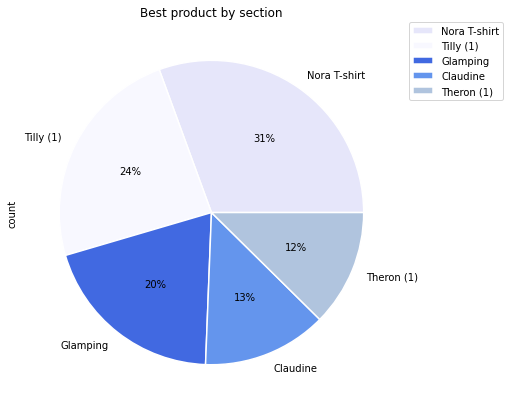

In [8]:
best_prod_by_section(df_articles, 'Womens Everyday Basics')

# **Customer**

In [9]:
df_customer = pd.read_csv(customers)
df_customer.head()

,customer_id,FN,Active,club_member_status,fashion_news_frequency,age,postal_code
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,NaN,NaN,ACTIVE,NONE,49.0,52043ee2162cf5aa7ee79974281641c6f11a68d276429a...
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,NaN,NaN,ACTIVE,NONE,25.0,2973abc54daa8a5f8ccfe9362140c63247c5eee03f1d93...
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,NaN,NaN,ACTIVE,NONE,24.0,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,NaN,NaN,ACTIVE,NONE,54.0,5d36574f52495e81f019b680c843c443bd343d5ca5b1c2...
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,1.0,1.0,ACTIVE,Regularly,52.0,25fa5ddee9aac01b35208d01736e57942317d756b32ddd...


In [10]:
# age distribution

import plotly.express as px

def distribution(value:pd.Series):
    result = value.value_counts()
    
    fig = px.bar(result, title="Age of customers")
    fig.update_layout(
        xaxis_title = "Age",
        yaxis_title = "Frequency",
        title_x = 0.5, 
        showlegend = False
    )
    fig.show()

In [11]:
distribution(df_customer['age'])

In [12]:
# Categorize Age

df_customer[df_customer['age'].isnull()] # check null value

,customer_id,FN,Active,club_member_status,fashion_news_frequency,age,postal_code
5,000064249685c11552da43ef22a5030f35a147f723d5b0...,NaN,NaN,NaN,NaN,NaN,2c29ae653a9282cce4151bd87643c907644e09541abc28...
54,0002b9088196900626214bcdc6d5f3d85f38fb462a4806...,NaN,NaN,ACTIVE,NONE,NaN,db2cef710598164a99187237dd049b68502590eeb41ca3...
99,0004690d2b68d5175697d197a86065595ef7b49c7c051b...,NaN,NaN,PRE-CREATE,NONE,NaN,d831ea0a55a7a7af0e3ff9da0d370e225242bbc7999d78...
138,0005cd85a6220e1f1c582c7ff9175efe7d7c16d184c5ba...,NaN,NaN,ACTIVE,NONE,NaN,ee66d2b71f2fe333bee3e0f4a2dbac1fcf022e0df38763...
148,00060d2f1e63f2b95268b8573996b9aa5612a3efc97c71...,NaN,NaN,PRE-CREATE,NONE,NaN,f2288fb8f9b8ee2c3e56d6aa813d2a22f820cdfabf27a6...
...,...,...,...,...,...,...,...
1371583,ffecf38e80a8d73c9c6fb6db193e559dbd5374747b4b88...,NaN,NaN,PRE-CREATE,NONE,NaN,f1aed4d6848c484f218f9f9de2820c3f072ece21a043f4...
1371637,ffefa8fa76909f9b9b3c14680d3e00dae891de5d1522f9...,NaN,NaN,PRE-CREATE,NONE,NaN,d83ed3f6f943055853438d25031e896102bb960d07074a...
1371712,fff2f8b52ac6983cf9b2332d1a9bfe0ef38349a8d5392e...,NaN,NaN,ACTIVE,NONE,NaN,3802682b139e3cd0631970d555e4af072475e4dd92ea0a...
1371888,fffb069903e91c2ea4d665851b821c3f812e184119e5a8...,NaN,NaN,PRE-CREATE,NONE,NaN,0e6ad38084bfc681be59ae67f0225049cee4dfef044c29...


<AxesSubplot:xlabel='age_group', ylabel='count'>

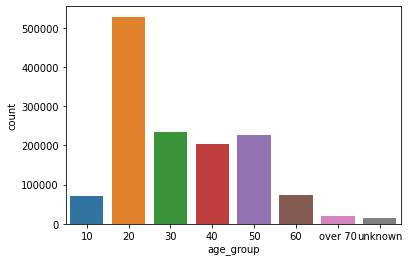

In [13]:
bins= [0,20,30,40,50,60,70,100]
labels = ['10','20','30','40','50','60','over 70']

df_customer['age_group'] = pd.cut(df_customer['age'], bins=bins, labels=labels, right=False)
df_customer['age_group'] = df_customer['age_group'].cat.add_categories('unknown').fillna('unknown')

sns.countplot(x='age_group',data=df_customer)

Text(0, 0.5, 'Club Member Status')

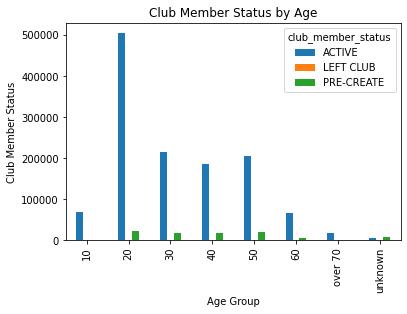

In [14]:
# club_member_status by age

club_member_status_age = df_customer.groupby(['age_group', 'club_member_status']).count()['customer_id'].reset_index()
pivot_df = club_member_status_age.pivot(index = 'age_group', columns = 'club_member_status', values = 'customer_id')
pivot_df.plot(kind="bar")
plt.title("Club Member Status by Age")
plt.xlabel("Age Group")
plt.ylabel("Club Member Status")

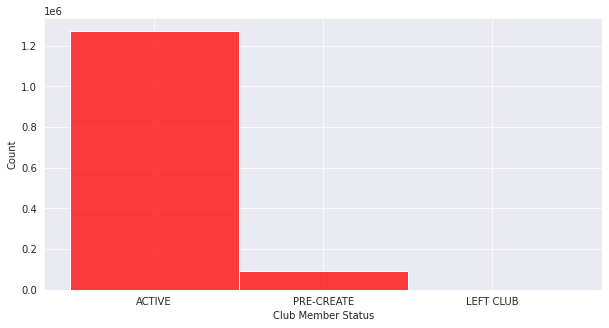

In [15]:
# club member status

sns.set_style("darkgrid")
f, ax = plt.subplots(figsize=(10,5))
ax = sns.histplot(data=df_customer, x='club_member_status', color='red')
ax.set_xlabel('Club Member Status')
plt.show()

In [16]:
def ratio_by_age(df:pd.DataFrame, column:str):
    
    column_category = df[column].unique().tolist()
    labels = df['age_group'].unique().tolist()
    fig = make_subplots(rows = 1, cols = len(column_category), specs = [[{'type':'domain'}, {'type':'domain'},{'type':'domain'}]])
    
    value_lst = []
    for i in range(len(column_category)):
        value = df[df[column] == column_category[i]]['count'].tolist()
        value_lst.append(value)
        
    for j in range(1, len(value_lst)+1):
        result = fig.add_trace(go.Pie(labels=labels, values=value_lst[j-1], name=column_category[j-1]), 1, j)
        
    fig.update_traces(hole=.4, hoverinfo="label+percent+name")
    fig.update_layout(
        title_text = '{} by Age Group'.format(column)
    )
    
    return result

In [17]:
# club member status : Active by age

age_ratio_by_status = df_customer.groupby(['club_member_status', 'age_group']).count()['customer_id'].reset_index(name = 'count')
ratio_by_age(age_ratio_by_status, 'club_member_status')

In [18]:
# NONE => None

fashion_news_frequency_lst = df_customer['fashion_news_frequency'].tolist()
for i in range(len(fashion_news_frequency_lst)):
    if fashion_news_frequency_lst[i] == 'NONE':
        fashion_news_frequency_lst[i] = fashion_news_frequency_lst[i].replace('NONE', 'None')
df_customer['fashion_news_frequency'] = fashion_news_frequency_lst

In [19]:
age_ratio_by_frequency = df_customer[df_customer['fashion_news_frequency'].isin(['None', 'Regularly', 'Monthly'])].groupby(['fashion_news_frequency', 'age_group']).count()['customer_id'].reset_index(name = 'count')
ratio_by_age(age_ratio_by_frequency, 'fashion_news_frequency')